# Bài tập

Sử dụng bộ dữ liệu này: https://groups.csail.mit.edu/sls/downloads/movie/

+ Training: engtrain.bio

+ Testing: engtest.bio

Hoặc các bộ dữ liệu khác trên thư mục này: https://github.com/thieu1995/csv-files/tree/main/data/text/ner-data


Xây dựng và so sánh các mô hình học máy trong scikit-learn cho bài toán NER.

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_url = 'https://groups.csail.mit.edu/sls/downloads/movie/engtrain.bio'
train_df = pd.read_csv(train_url, sep='\t', header=None, names=['tag', 'word'])
train_df

,tag,word
0,O,what
1,O,movies
2,O,star
3,B-ACTOR,bruce
4,I-ACTOR,willis
...,...,...
99486,B-CHARACTER,scarlett
99487,I-CHARACTER,o
99488,I-CHARACTER,hara
99489,O,in


In [3]:
train_tokens = train_df['word'].tolist()
train_tags = train_df['tag'].tolist()

In [4]:
test_url = 'https://groups.csail.mit.edu/sls/downloads/movie/engtest.bio'
test_df = pd.read_csv(test_url, sep='\t', header=None, names=['tag', 'word'])
test_df

,tag,word
0,O,are
1,O,there
2,O,any
3,O,good
4,B-GENRE,romantic
...,...,...
24681,O,movie
24682,O,about
24683,B-CHARACTER,captain
24684,I-CHARACTER,jack


In [8]:
test_tokens = test_df['word'].tolist()
test_tags = test_df['tag'].tolist()

In [9]:
dataset = {
    "train_tokens": train_tokens,
    "train_tags": train_tags,
    "test_tokens": test_tokens,
    "train_tags": train_tags,
}

In [7]:
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
import numpy as np

# Load BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
bert_model = BertModel.from_pretrained('bert-base-cased')

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
X = vectorizer.fit_transform(train_tokens+test_tokens)
X_train = X[:len(train_tokens)]
X_test = X[len(train_tokens):]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(train_tags+test_tags)
y_train = y[:len(train_tags)]
y_test = y[len(train_tags):]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(99491, 7446) (99491,)
(24686, 7446) (24686,)


### Train the Model

['O' 'O' 'O' ... 'B-CHARACTER' 'I-CHARACTER' 'I-CHARACTER']
['O' 'O' 'O' ... 'O' 'B-ACTOR' 'I-CHARACTER']


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                   precision    recall  f1-score   support

          B-ACTOR       0.76      0.78      0.77       812
      B-CHARACTER       0.82      0.20      0.32        90
       B-DIRECTOR       0.71      0.46      0.56       456
          B-GENRE       0.86      0.93      0.90      1117
           B-PLOT       0.60      0.37      0.46       491
         B-RATING       0.99      0.56      0.72       500
B-RATINGS_AVERAGE       0.68      0.59      0.63       451
         B-REVIEW       0.00      0.00      0.00        56
           B-SONG       0.50      0.02      0.04        54
          B-TITLE       0.62      0.29      0.40       562
        B-TRAILER       0.81      0.87      0.84        30
           B-YEAR       0.91      0.93      0.92       720
          I-ACTOR       0.84      0.65      0.73       862
      I-CHARACTER       0.64      0.21      0.32        75
       I-DIRECTOR       0.76      0.40      0.53       496
          I-GENRE       0.96      0.49      0.65       

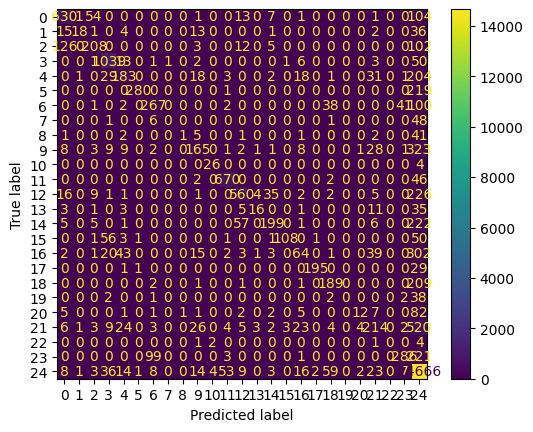

In [15]:
from sklearn import svm

# Train SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)

y_true_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

print(y_true_labels)
print(y_pred_labels)
print(classification_report(y_true_labels, y_pred_labels))

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

['O' 'O' 'O' ... 'B-CHARACTER' 'I-CHARACTER' 'I-CHARACTER']
['O' 'O' 'O' ... 'B-TITLE' 'B-ACTOR' 'I-CHARACTER']


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                   precision    recall  f1-score   support

          B-ACTOR       0.75      0.74      0.74       812
      B-CHARACTER       0.56      0.28      0.37        90
       B-DIRECTOR       0.69      0.45      0.55       456
          B-GENRE       0.85      0.92      0.89      1117
           B-PLOT       0.58      0.35      0.44       491
         B-RATING       0.97      0.56      0.71       500
B-RATINGS_AVERAGE       0.65      0.60      0.62       451
         B-REVIEW       0.09      0.02      0.03        56
           B-SONG       0.35      0.13      0.19        54
          B-TITLE       0.58      0.26      0.36       562
        B-TRAILER       0.81      0.87      0.84        30
           B-YEAR       0.89      0.93      0.91       720
          I-ACTOR       0.82      0.58      0.68       862
      I-CHARACTER       0.53      0.21      0.30        75
       I-DIRECTOR       0.77      0.37      0.50       496
          I-GENRE       0.77      0.53      0.63       

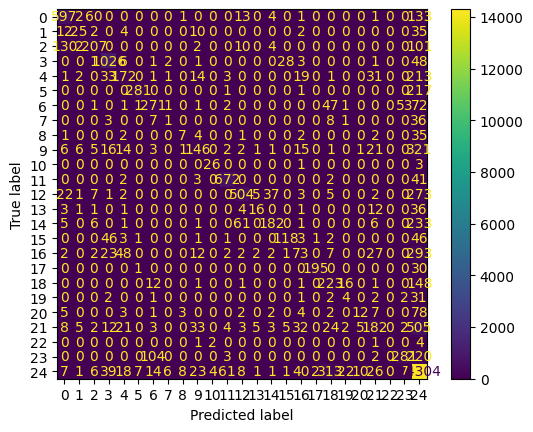

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

y_true_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

print(y_true_labels)
print(y_pred_labels)
print(classification_report(y_true_labels, y_pred_labels))

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


['O' 'O' 'O' ... 'B-CHARACTER' 'I-CHARACTER' 'I-CHARACTER']
['O' 'O' 'O' ... 'O' 'B-ACTOR' 'O']


c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

                   precision    recall  f1-score   support

          B-ACTOR       0.74      0.71      0.72       812
      B-CHARACTER       0.00      0.00      0.00        90
       B-DIRECTOR       0.81      0.38      0.51       456
          B-GENRE       0.86      0.93      0.89      1117
           B-PLOT       0.66      0.15      0.25       491
         B-RATING       0.99      0.56      0.72       500
B-RATINGS_AVERAGE       0.81      0.33      0.47       451
         B-REVIEW       0.00      0.00      0.00        56
           B-SONG       0.00      0.00      0.00        54
          B-TITLE       0.65      0.22      0.33       562
        B-TRAILER       0.00      0.00      0.00        30
           B-YEAR       0.93      0.90      0.92       720
          I-ACTOR       0.81      0.66      0.73       862
      I-CHARACTER       0.00      0.00      0.00        75
       I-DIRECTOR       0.83      0.34      0.48       496
          I-GENRE       0.96      0.49      0.65       

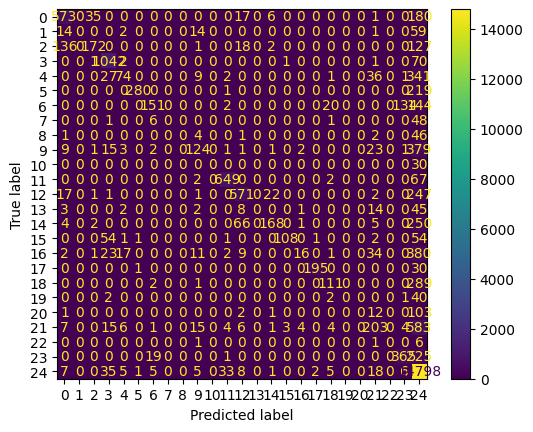

In [17]:
from sklearn.naive_bayes import MultinomialNB
model= MultinomialNB()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

y_true_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

print(y_true_labels)
print(y_pred_labels)
print(classification_report(y_true_labels, y_pred_labels))

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:146

['O' 'O' 'O' ... 'B-CHARACTER' 'I-CHARACTER' 'I-CHARACTER']
['O' 'O' 'O' ... 'O' 'B-ACTOR' 'O']
                   precision    recall  f1-score   support

          B-ACTOR       0.76      0.70      0.73       812
      B-CHARACTER       0.93      0.14      0.25        90
       B-DIRECTOR       0.72      0.43      0.54       456
          B-GENRE       0.87      0.92      0.90      1117
           B-PLOT       0.59      0.27      0.37       491
         B-RATING       0.99      0.56      0.72       500
B-RATINGS_AVERAGE       0.70      0.54      0.61       451
         B-REVIEW       0.00      0.00      0.00        56
           B-SONG       0.00      0.00      0.00        54
          B-TITLE       0.64      0.27      0.38       562
        B-TRAILER       0.81      0.83      0.82        30
           B-YEAR       0.93      0.90      0.92       720
          I-ACTOR       0.83      0.65      0.73       862
      I-CHARACTER       0.79      0.15      0.25        75
       I-DIRECTOR 

c:\Users\1sosu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


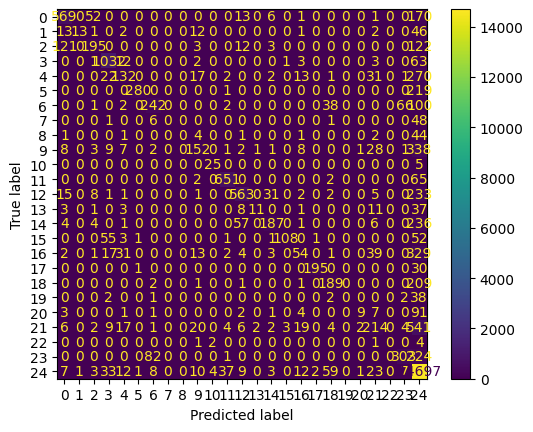

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

y_true_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred)

print(y_true_labels)
print(y_pred_labels)
print(classification_report(y_true_labels, y_pred_labels))

#accuracy score
print(f"Accuracy:{accuracy_score(y_test, y_pred)}")

# draw confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)